In [9]:
import pandas as pd
import numpy as np
import seaborn as sns


In [10]:
df=pd.read_csv("../Datasets/UpdatedStudentsPerformance.csv")

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   990 non-null    float64
 6   reading score                985 non-null    float64
 7   writing score                989 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [14]:
df["math score"].fillna(df["math score"].mean(),inplace=True)
df["reading score"].fillna(df["reading score"].mean(),inplace=True)
df["writing score"].fillna(df["writing score"].mean(),inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
genderData=df["gender"].unique();
genderData

array(['female', 'male', 'f'], dtype=object)

In [17]:
df["gender"].replace("f","female",inplace=True)


In [18]:
genderData=df["gender"].unique();
genderData
# Data cleaning and formatting done

array(['female', 'male'], dtype=object)

<Axes: >

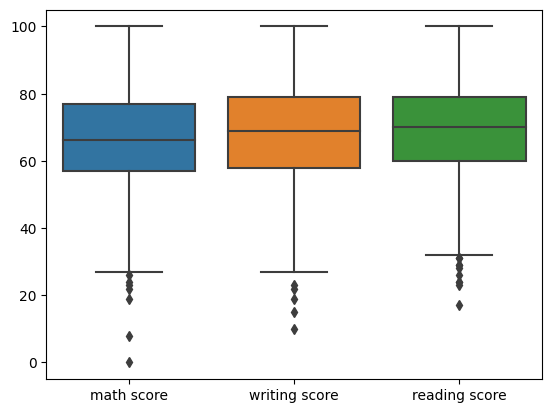

In [19]:
sns.boxplot(data=df[['math score' ,'writing score' ,  'reading score']])

<Axes: >

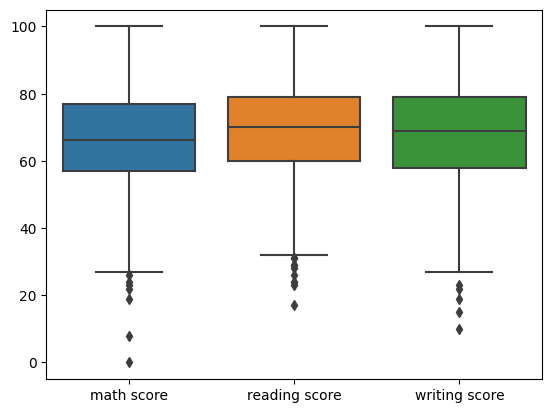

In [20]:
# second way to plot boxplot possible on all fields
sns.boxplot(df)

In [21]:
# Calculated Q1,Q3 and InterQuartile Range for each field
Q1_math=df['math score'].quantile(0.25)
Q3_math=df['math score'].quantile(0.75)
IQR_math=Q3_math-Q1_math
print(IQR_math)

Q1_reading=df['reading score'].quantile(0.25)
Q3_reading=df['reading score'].quantile(0.75)
IQR_reading=Q3_reading-Q1_reading
print(IQR_reading)

Q1_writing=df['writing score'].quantile(0.25)
Q3_writing=df['writing score'].quantile(0.75)
IQR_writing=Q3_writing-Q1_writing
print(IQR_writing)

20.0
19.0
21.0


In [22]:
# calculated the low and high for each field
low_math=Q1_math-1.5*IQR_math
high_math=Q3_math+1.5*IQR_math

low_reading=Q1_reading-1.5*IQR_reading
high_reading=Q3_reading+1.5*IQR_reading

low_writing=Q1_writing-1.5*IQR_writing
high_writing=Q3_writing+1.5*IQR_writing




In [23]:
# Searched for outliers
outliers_math = df[(df['math score'] < low_math) | (df['math score'] > high_math)]
outliers_reading = df[(df['reading score'] < low_reading) | (df['reading score'] > high_reading)]
outliers_writing = df[(df['writing score'] < low_writing) | (df['writing score'] > high_writing)]

In [24]:
# filtered the outliers
df_filtered = df[~df.index.isin(outliers_math.index)]
df_filtered2 = df_filtered[~df_filtered.index.isin(outliers_reading.index)]
df_filtered_final = df_filtered2[~df_filtered2.index.isin(outliers_writing.index)]

<Axes: >

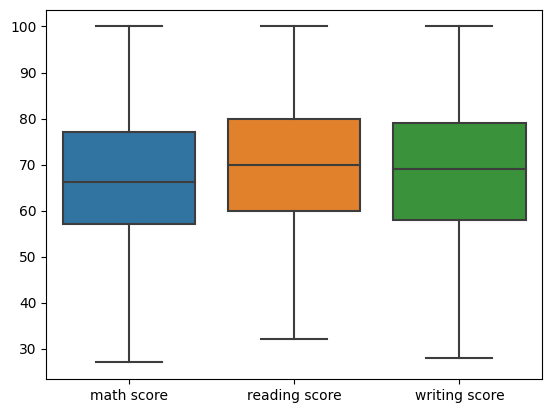

In [25]:
# plotted the boxplot where outliers are removed
sns.boxplot(df_filtered_final)

In [26]:
# MINMAX NORMALIZATION

df_minmax=df.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns=["math score","reading score", "writing score"]
for column in columns:
    df_minmax[column] = scaler.fit_transform(df_minmax[column].values.reshape(-1, 1))

# x_normalized = (x - min(x)) / (max(x) - min(x))

In [27]:
df_minmax.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


<Axes: >

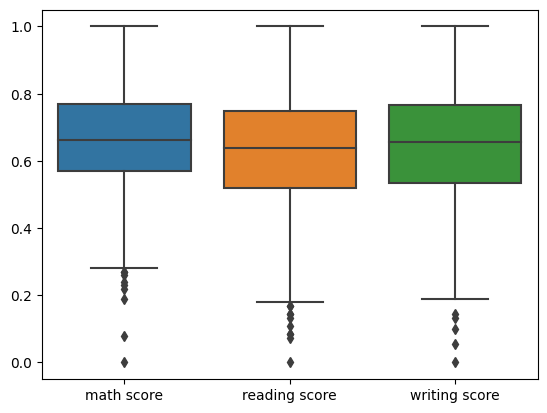

In [28]:
sns.boxplot(df_minmax)

In [29]:
outliers_minmax_math=df_minmax[(df_minmax["math score"]<0)|(df_minmax["math score"]>1)]
outliers_minmax_reading=df_minmax[(df_minmax["reading score"]<0)|(df["writing score"]>1)]
outliers_minmax_writing=df_minmax[(df["writing score"]<0)|df["writing score"]>1]



In [30]:
df_minmax1=df_minmax[~df_minmax]

TypeError: bad operand type for unary ~: 'str'

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['reading score'] = scaler.fit_transform(df['reading score'].values.reshape(-1, 1))